In [1]:
#!pip install yfinance
#!pip install pandas
#!pip install requests
#!pip install bs4
#!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 84.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 kB 21.3 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.4
    Uninstalling lxml-4.6.4:
      Successfully uninstalled lxml-4.6.4
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [62]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [4]:
Tesla = yf.Ticker('TSLA')

In [5]:
tesla_data = Tesla.history(period = "max")

In [6]:
tesla_data.reset_index(inplace = True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [9]:
url = "https://stockanalysis.com/stocks/tsla/revenue/"
html_data = requests.get(url).text

In [26]:
soup = BeautifulSoup(html_data, "html.parser")

In [63]:
tesla_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody")[0].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace(".", "").replace("B", "0000000").replace("M", "0000")
    
    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)

In [64]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [72]:
tesla_revenue.tail()

,Date,Revenue
20,"Jan 31, 2004",1580000000
21,"Feb 1, 2003",1350000000
22,"Feb 2, 2002",1120000000
23,"Feb 3, 2001",756700000
24,"Jan 30, 1999",465170000


In [36]:
GameStop = yf.Ticker("GME")

In [37]:
gme_data = GameStop.history(period = 'max')

In [38]:
gme_data.reset_index(inplace = True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [41]:
url = "https://stockanalysis.com/stocks/gme/revenue/"
html_data = requests.get(url).text

In [42]:
soup = BeautifulSoup(html_data, "html.parser")

In [68]:
gme_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody")[0].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace(".", "").replace("B", "0000000").replace("M", "0000")
    
    gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)

In [73]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
gme_revenue.tail()

,Date,Revenue
20,"Jan 31, 2004",1580000000
21,"Feb 1, 2003",1350000000
22,"Feb 2, 2002",1120000000
23,"Feb 3, 2001",756700000
24,"Jan 30, 1999",465170000


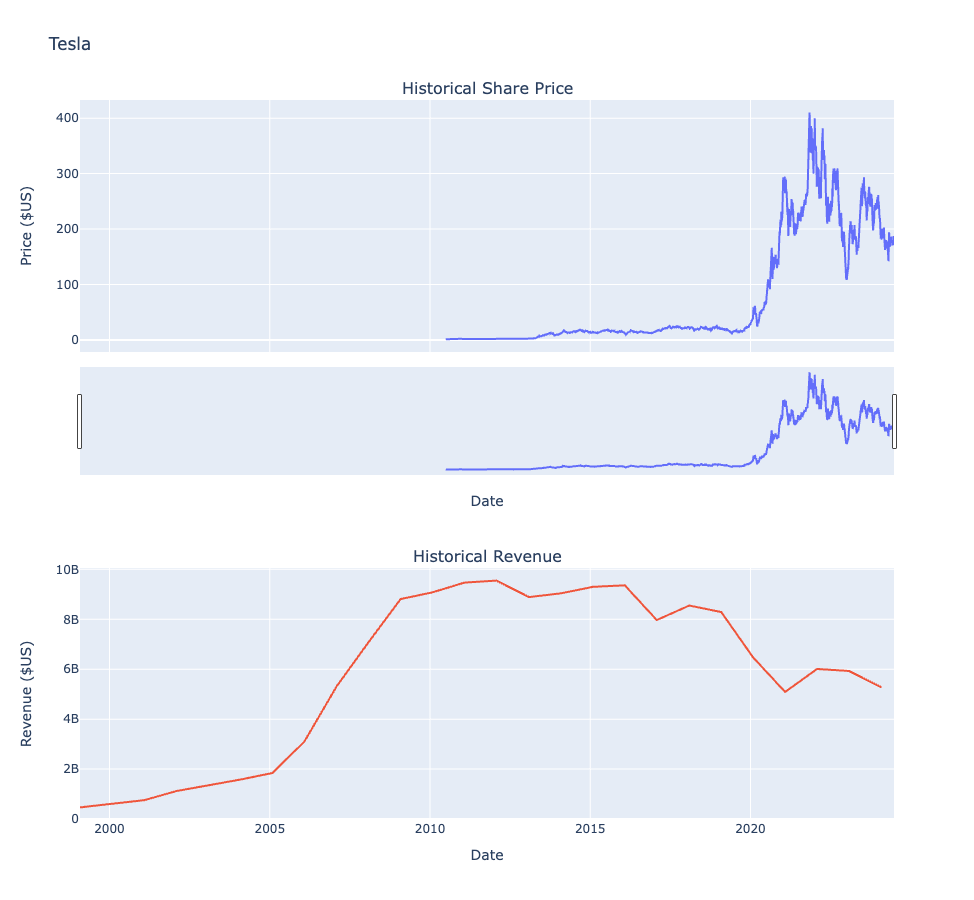

In [70]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

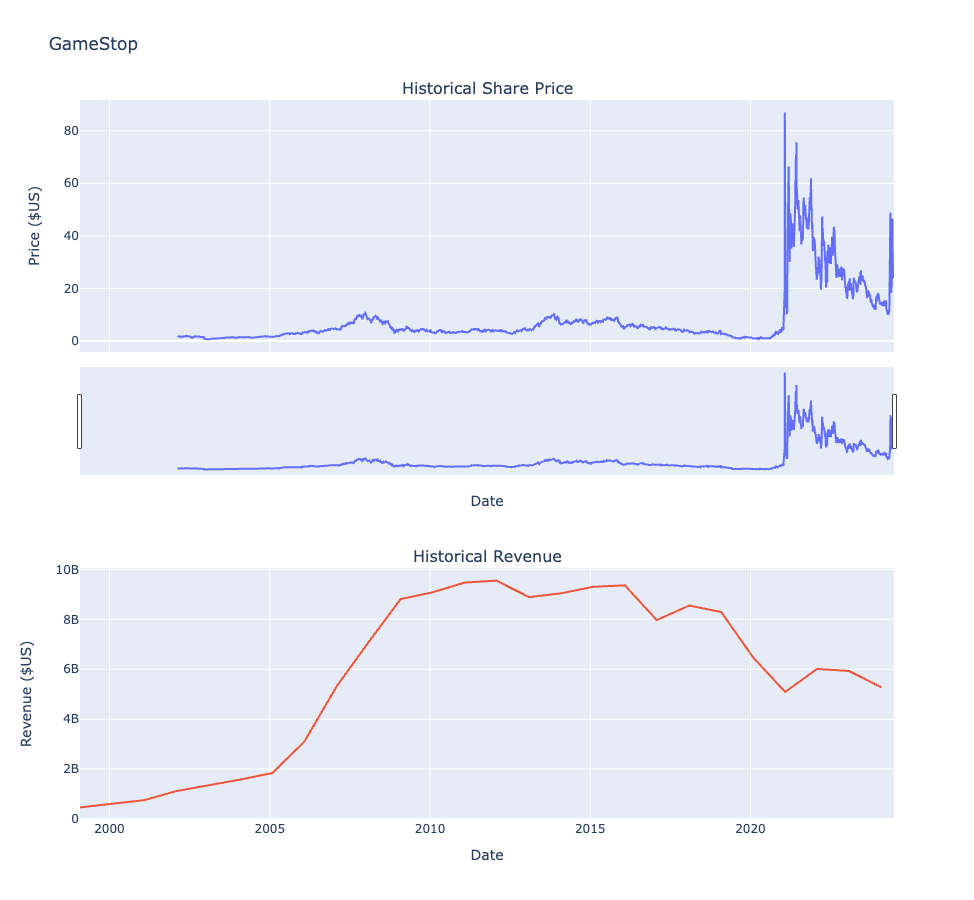

In [71]:
make_graph(gme_data, gme_revenue, 'GameStop')